# Zadanie 6.7

Przyblizenie $\pi$ przez kolejne kroki na drzewie Sterna-Brocota:

In [1]:
import numpy as np

pi_str = 'P'*3+'L'*7+'P'*15+'L'+'P'*292+'LPL'+'P'*2+'L'+'P'*3+'L'+'P'*14+'L'*2+'P'
print pi_str

PPPLLLLLLLPPPPPPPPPPPPPPPLPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPLPLPPLPPPLPPPPPPPPPPPPPPLLP


Funkcja odtwarzająca ułamek na podstawie jego reprezentacji przez kolejne kroki:

In [2]:
I = np.matrix([[1,0],[0,1]])
P = np.matrix([[1,0],[1,1]])
L = np.matrix([[1,1],[0,1]])


def SBTdecoder(in_str='LPPL'):
    res = I
    for s in in_str:
        if s == 'P':
            res = res * P
        if s =='L':
            res = res * L
    return np.sum(res[1,:]), np.sum(res[0,:])

print SBTdecoder()

(5, 7)


Ułamki o mianownikach mniejszych niż $50$:

In [78]:
for i in range(1,len(pi_str)):
    tmp_res = SBTdecoder(pi_str[:i])

    if tmp_res[1] < 50:
        print 'step %d, %d/%d = %.4f, delta = %.4f' \
            % (i,tmp_res[0],tmp_res[1],tmp_res[0]*1./tmp_res[1],np.pi-tmp_res[0]*1./tmp_res[1], )

step 1, 2/1 = 2.0000, delta = 1.1416
step 2, 3/1 = 3.0000, delta = 0.1416
step 3, 4/1 = 4.0000, delta = -0.8584
step 4, 7/2 = 3.5000, delta = -0.3584
step 5, 10/3 = 3.3333, delta = -0.1917
step 6, 13/4 = 3.2500, delta = -0.1084
step 7, 16/5 = 3.2000, delta = -0.0584
step 8, 19/6 = 3.1667, delta = -0.0251
step 9, 22/7 = 3.1429, delta = -0.0013
step 10, 25/8 = 3.1250, delta = 0.0166
step 11, 47/15 = 3.1333, delta = 0.0083
step 12, 69/22 = 3.1364, delta = 0.0052
step 13, 91/29 = 3.1379, delta = 0.0037
step 14, 113/36 = 3.1389, delta = 0.0027
step 15, 135/43 = 3.1395, delta = 0.0021


Ułamki o mianowikach mniejszych niż $500$ i odstające od $\pi$ co najwyżej o $2\times10^{-3}$:

In [82]:
deltas = []

for i in range(0,len(pi_str)):
    tmp_res = SBTdecoder(pi_str[:i])
    delta = np.pi-tmp_res[0]*1./tmp_res[1]
    
    if (tmp_res[1]<500) and (np.abs(delta) < 2e-3):
        print 'step %d: %d/%d = %.6f, delta = %.6f' \
            % (i, tmp_res[0],tmp_res[1],tmp_res[0]*1./tmp_res[1],np.pi-tmp_res[0]*1./tmp_res[1] )

    deltas.append(delta)

step 9: 22/7 = 3.142857, delta = -0.001264
step 16: 157/50 = 3.140000, delta = 0.001593
step 17: 179/57 = 3.140351, delta = 0.001242
step 18: 201/64 = 3.140625, delta = 0.000968
step 19: 223/71 = 3.140845, delta = 0.000748
step 20: 245/78 = 3.141026, delta = 0.000567
step 21: 267/85 = 3.141176, delta = 0.000416
step 22: 289/92 = 3.141304, delta = 0.000288
step 23: 311/99 = 3.141414, delta = 0.000179
step 24: 333/106 = 3.141509, delta = 0.000083
step 25: 355/113 = 3.141593, delta = -0.000000
step 26: 688/219 = 3.141553, delta = 0.000040
step 27: 1043/332 = 3.141566, delta = 0.000026
step 28: 1398/445 = 3.141573, delta = 0.000020


$\pi - \pi_{25}$=

In [83]:
print '%.7f' % deltas[25]

-0.0000003


Odstępstwa od $\pi$ (oraz logarytmy ich modułów) w funkcji liczby wykorzystanych znaków rozwinięcia $n$

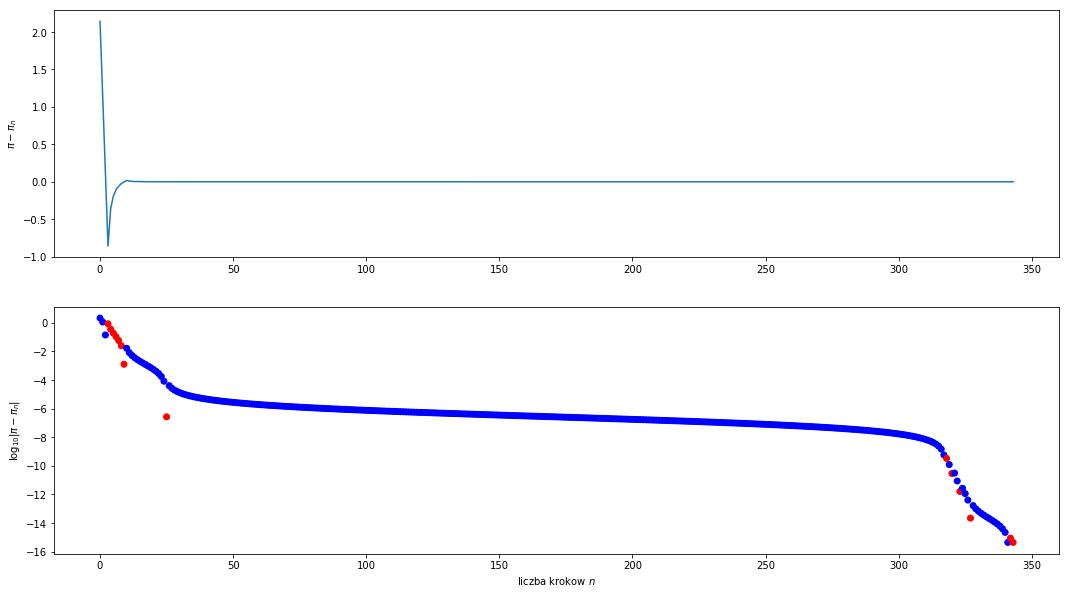

In [84]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(18, 10))
deltas = deltas[:-1]

axs[0].plot(deltas)
axs[0].set_ylabel('$\pi - \pi_n$')

sgn = np.sign(deltas)
log_deltas = np.log10(np.abs(deltas))
axs[1].scatter(range(len(log_deltas)),log_deltas,c=map(lambda x : {-1:'r',1:'b'}[x],sgn))
axs[1].set_xlabel('liczba krokow $n$')
axs[1].set_ylabel('$\log_{10}|\pi - \pi_n|$');